In [ ]:
import h5py
import numpy as np

# Path to your .h5 file
file_path = '/global/cfs/cdirs/m3246/vmikuni/for_nishank/Aachen/train_ttbar.h5'

# Load the .h5 file
with h5py.File(file_path, 'r') as f:
    # Access the 'data' and 'pid' keys
    data = f['data'][:]
    pid = f['pid'][:]

# Ensure data is loaded
print(f"Data shape: {data.shape}")
print(f"PID shape: {pid.shape}")

# Find indices for pid1 and pid0
indices_pid1 = np.where(pid == 1)[0]
indices_pid0 = np.where(pid == 0)[0]

# Randomly select 10 events for each PID
np.random.seed(42)  # For reproducibility
random_indices_pid1 = np.random.choice(indices_pid1, 1, replace=False)
random_indices_pid0 = np.random.choice(indices_pid0, 1, replace=False)

# Extract the features for the selected events
data_pid1 = data[random_indices_pid1]
data_pid0 = data[random_indices_pid0]

# Print the features of the 10 random events for each PID
print("\nFeatures for 10 random events with pid1:")
for i, event in enumerate(data_pid1):
    print(f"Event {i+1}: {event}")

print("\nFeatures for 10 random events with pid0:")
for i, event in enumerate(data_pid0):
    print(f"Event {i+1}: {event}")


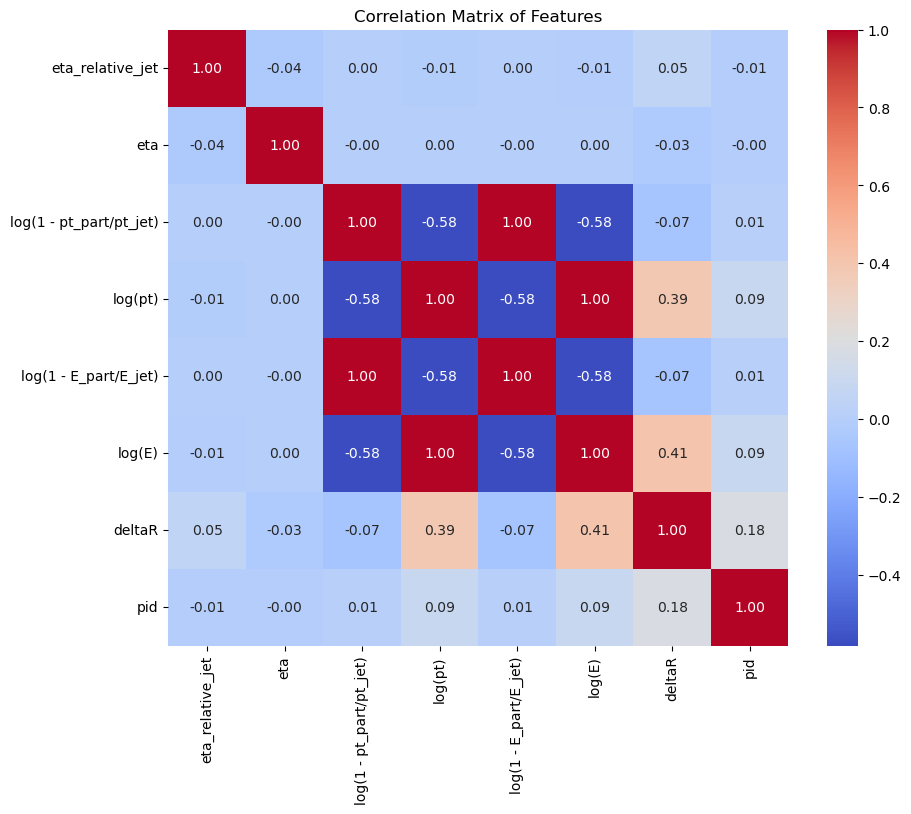

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import shap
from sklearn.ensemble import RandomForestClassifier

# Load events from the HDF5 file
def load_events(file_path, num_events=100):
    with h5py.File(file_path, 'r') as f:
        data = f['data'][:num_events]  # Load the first `num_events` events
        pid = f['pid'][:num_events]    # Load the first `num_events` pids
    return data, pid

# Convert the loaded events into a DataFrame
def create_dataframe(data, pid, feature_names):
    # Flatten the data by concatenating the particle features for each event
    num_events, num_particles, num_features = data.shape
    flattened_data = data.reshape(num_events * num_particles, num_features)
    
    # Repeat the pid values for each particle in the event
    repeated_pid = np.repeat(pid, num_particles)

    df = pd.DataFrame(flattened_data, columns=feature_names)
    df['pid'] = repeated_pid
    return df

# Plot the correlation matrix
def plot_correlation_matrix(df):
    corr = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix of Features')
    plt.show()

# Train the model and plot SHAP values
def plot_shap_summary(df, feature_names):
    X = df[feature_names]
    y = df['pid']

    clf = RandomForestClassifier()
    clf.fit(X, y)

    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)

    # Ensure shap_values shape matches the data shape by selecting the correct indices
    shap.summary_plot(shap_values[1], X, feature_names=feature_names)

# Main function
def main(file_path, num_events=100):
    feature_names = ['eta_relative_jet', 'eta', 'log(1 - pt_part/pt_jet)', 'log(pt)', 'log(1 - E_part/E_jet)', 'log(E)', 'deltaR']

    # Load events and create DataFrame
    data, pid = load_events(file_path, num_events)
    df = create_dataframe(data, pid, feature_names)

    # Plot correlation matrix
    plot_correlation_matrix(df)

    # Plot SHAP summary plot
    plot_shap_summary(df, feature_names)

if __name__ == "__main__":
    file_path = '/global/cfs/cdirs/m3246/vmikuni/for_nishank/Aachen/train_ttbar.h5'  # Replace with your actual file path
    main(file_path, num_events=100)


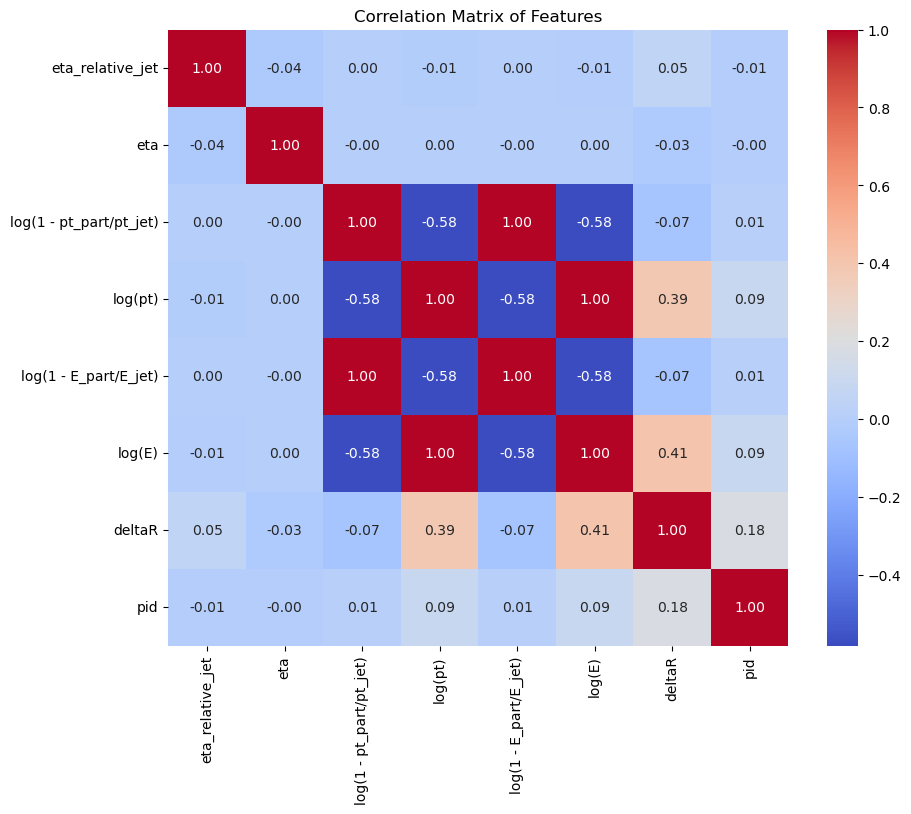

Shape of SHAP values: (7, 2)
Shape of feature data: (12800, 7)


AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [13]:
import shap
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

def plot_shap_summary(df, feature_names):
    # Select only the features (excluding 'pid')
    X = df[feature_names]
    y = df['pid']

    # Train a random forest classifier
    clf = RandomForestClassifier()
    clf.fit(X, y)

    # Compute SHAP values
    explainer = shap.TreeExplainer(clf)
    shap_values = explainer.shap_values(X)

    # Check the shapes
    print(f"Shape of SHAP values: {shap_values[0].shape}")
    print(f"Shape of feature data: {X.shape}")

    # Ensure correct SHAP values and data shapes are used for plotting
    shap.summary_plot(shap_values[1], X, feature_names=feature_names)

if __name__ == "__main__":
    file_path = '/global/cfs/cdirs/m3246/vmikuni/for_nishank/Aachen/train_ttbar.h5'
    num_events = 100  # Adjust the number of events as needed
    
    # Run your main logic to load the data and generate the DataFrame
    main(file_path, num_events)
    
    # Define your feature names
    feature_names = ['eta_relative_jet', 'eta', 'log(1 - pt_part/pt_jet)', 'log(pt)', 
                     'log(1 - E_part/E_jet)', 'log(E)', 'deltaR']
    
    # Plot SHAP summary plot
    plot_shap_summary(df, feature_names)
